In [1]:
import pandas as pd
import numpy as np

import sklearn
import sklearn.model_selection as ms
import sklearn.metrics as mx

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import imblearn.over_sampling as imbos

import matplotlib.pyplot as plt
import seaborn as sns

import model_functions

%matplotlib inline

Version 7.1.0 of praw is outdated. Version 7.1.2 was released 1 day ago.


# Support Vector Classifier

In [2]:
model_data, X, y = model_functions.import_model_data('/Users/christineegan/AppleM1SentimentAnalysis/data/combined_data/model_data/2021-02-05_13_04_16.csv')


[*] Importing model data...


### Grid Search

In [3]:
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3) 
  
grid.fit(X, y) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.5s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.1s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.9s
[CV 2/5] END ..................C=0.1, gamma=0.01,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [4]:
params = grid.best_params_
params['probability'] = True

print('Best Parameters: \n', params)

clfs = [SVC(**params)]
cv = sklearn.model_selection.StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

Best Parameters: 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}


### Model Results (without SMOTE)

Test Size:  0.2
[*] Generating basic model with TTS for: SVC(C=10, gamma=0.1, probability=True) ...
[*] Generating Classification Report...

Classification Report
              precision    recall  f1-score   support

        -1.0       0.97      0.85      0.90       344
         1.0       0.96      0.99      0.98      1246

    accuracy                           0.96      1590
   macro avg       0.96      0.92      0.94      1590
weighted avg       0.96      0.96      0.96      1590

----------------------------------------------------------------------------------------------------

Confusion Matrix and ROC Plot
----------------------------------------------------------------------------------------------------


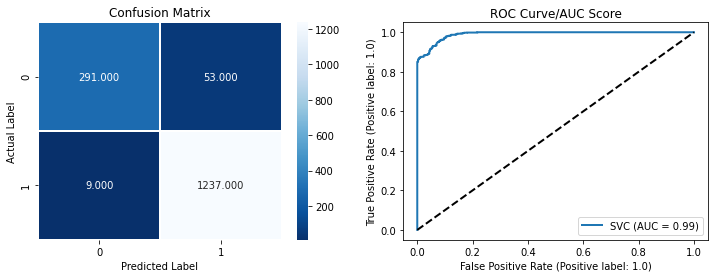


Test Size:  0.3
[*] Generating basic model with TTS for: SVC(C=10, gamma=0.1, probability=True) ...
[*] Generating Classification Report...

Classification Report
              precision    recall  f1-score   support

        -1.0       0.97      0.83      0.89       493
         1.0       0.96      0.99      0.97      1892

    accuracy                           0.96      2385
   macro avg       0.96      0.91      0.93      2385
weighted avg       0.96      0.96      0.96      2385

----------------------------------------------------------------------------------------------------

Confusion Matrix and ROC Plot
----------------------------------------------------------------------------------------------------


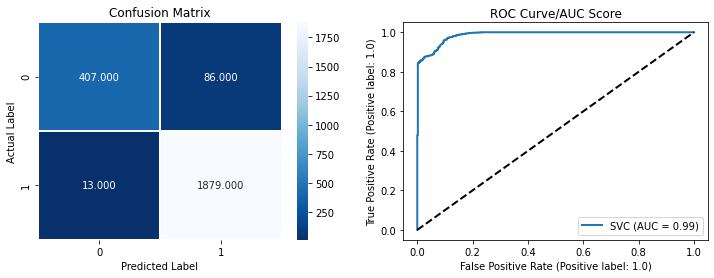


Test Size:  0.4
[*] Generating basic model with TTS for: SVC(C=10, gamma=0.1, probability=True) ...
[*] Generating Classification Report...

Classification Report
              precision    recall  f1-score   support

        -1.0       0.96      0.83      0.89       644
         1.0       0.96      0.99      0.98      2536

    accuracy                           0.96      3180
   macro avg       0.96      0.91      0.93      3180
weighted avg       0.96      0.96      0.96      3180

----------------------------------------------------------------------------------------------------

Confusion Matrix and ROC Plot
----------------------------------------------------------------------------------------------------


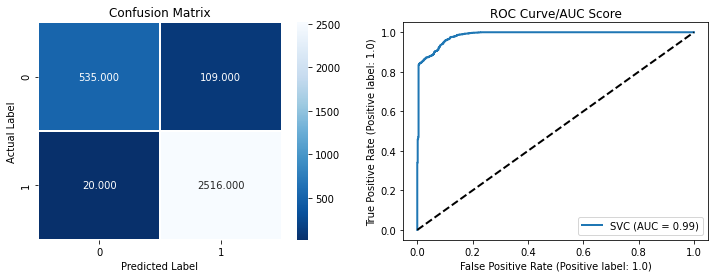

,Accuracy,AUC,Precision,Recall,F1
0,0.962264,0.989431,0.958873,0.995257,0.976726
1,0.966667,0.988031,0.963275,0.996044,0.979385
2,0.962893,0.990198,0.965251,0.988924,0.976944
3,0.968553,0.991414,0.966232,0.995257,0.980530
4,0.970440,0.989659,0.970611,0.992880,0.981619
mean,0.966164,0.989747,0.964848,0.993672,0.979041



[*] Plotting ROC...


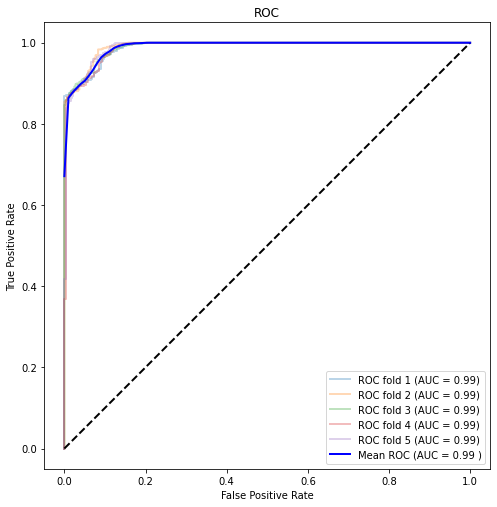

In [5]:
model_scores = model_functions.model_results(clfs, X, y, use_smote=False)

### Model Results (with SMOTE)

Test Size:  0.2
[*] Generating basic model with TTS for: SVC(C=10, gamma=0.1, probability=True) ...
[*] Oversampling data with SMOTE
[*] Generating Classification Report...

Classification Report
              precision    recall  f1-score   support

        -1.0       0.96      0.87      0.91       344
         1.0       0.96      0.99      0.98      1246

    accuracy                           0.96      1590
   macro avg       0.96      0.93      0.94      1590
weighted avg       0.96      0.96      0.96      1590

----------------------------------------------------------------------------------------------------

Confusion Matrix and ROC Plot
----------------------------------------------------------------------------------------------------


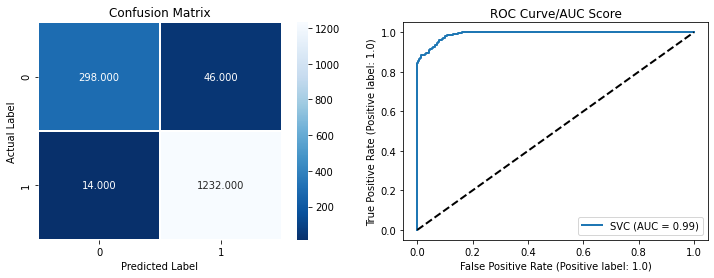


Test Size:  0.3
[*] Generating basic model with TTS for: SVC(C=10, gamma=0.1, probability=True) ...
[*] Oversampling data with SMOTE
[*] Generating Classification Report...

Classification Report
              precision    recall  f1-score   support

        -1.0       0.95      0.85      0.90       493
         1.0       0.96      0.99      0.98      1892

    accuracy                           0.96      2385
   macro avg       0.96      0.92      0.94      2385
weighted avg       0.96      0.96      0.96      2385

----------------------------------------------------------------------------------------------------

Confusion Matrix and ROC Plot
----------------------------------------------------------------------------------------------------


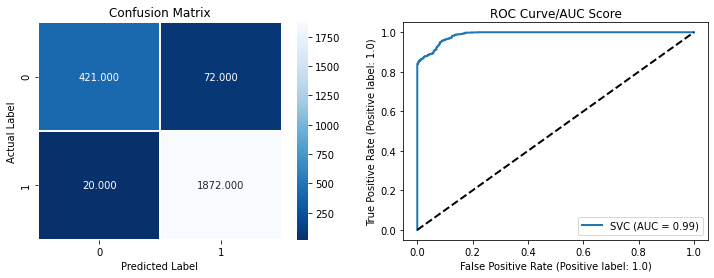


Test Size:  0.4
[*] Generating basic model with TTS for: SVC(C=10, gamma=0.1, probability=True) ...
[*] Oversampling data with SMOTE
[*] Generating Classification Report...

Classification Report
              precision    recall  f1-score   support

        -1.0       0.94      0.84      0.89       644
         1.0       0.96      0.99      0.97      2536

    accuracy                           0.96      3180
   macro avg       0.95      0.92      0.93      3180
weighted avg       0.96      0.96      0.96      3180

----------------------------------------------------------------------------------------------------

Confusion Matrix and ROC Plot
----------------------------------------------------------------------------------------------------


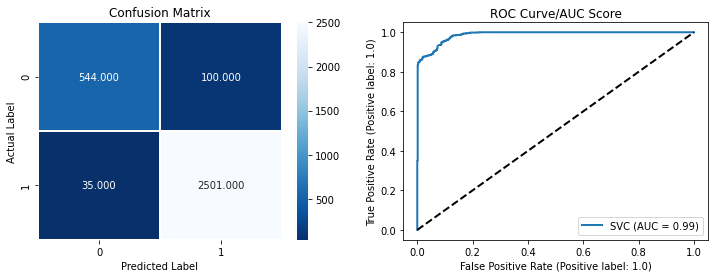

,Accuracy,AUC,Precision,Recall,F1
0,0.962264,0.989431,0.958873,0.995257,0.976726
1,0.966667,0.988031,0.963275,0.996044,0.979385
2,0.962893,0.990198,0.965251,0.988924,0.976944
3,0.968553,0.991414,0.966232,0.995257,0.980530
4,0.970440,0.989659,0.970611,0.992880,0.981619
mean,0.966164,0.989747,0.964848,0.993672,0.979041



[*] Oversamping data with SMOTE...

[*] Plotting ROC...


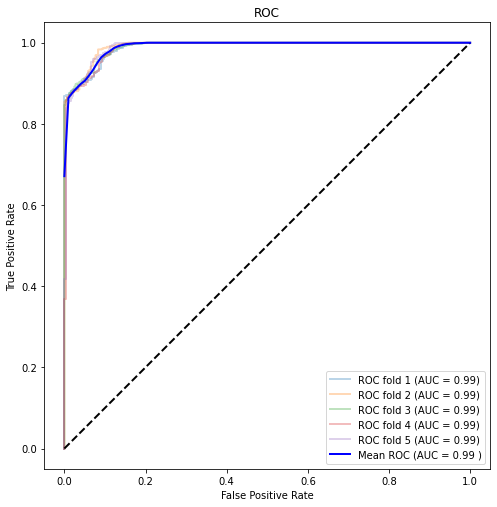

In [6]:
model_scores = model_functions.model_results(clfs, X, y, use_smote=True)